In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("C:/Users/Abhishek/Desktop/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Looking for missing values in the dataset
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
# Re-naming the columns
df.rename(columns={'Dataset':'Outcome'}, inplace=True)

In [5]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

In [6]:
# Having a look at the dataset after the numerical transformation
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
#displaying datset with missing 'Albumin_and_Globulin_Ratio' values for eg. entry numbered 209,241,253,312
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       2              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
5     46       1              1.8               0.7                   208   
6     26       2              0.9               0.2                   154   
7     29       2              0.9               0.3                   202   
8     17       1              0.9               0.3                   202   
9     55       1              0.7               0.2                   290   
10    57       1              0.6               0.1                   210   
11    72       1              2.7               1.3                   260   

In [8]:
#filling missing values with most frequent entries
df = df.fillna(df['Albumin_and_Globulin_Ratio'].value_counts().index[0])

In [9]:
#after filling
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       2              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
5     46       1              1.8               0.7                   208   
6     26       2              0.9               0.2                   154   
7     29       2              0.9               0.3                   202   
8     17       1              0.9               0.3                   202   
9     55       1              0.7               0.2                   290   
10    57       1              0.6               0.1                   210   
11    72       1              2.7               1.3                   260   

In [10]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


In [11]:
df.Gender.value_counts()

1    441
2    142
Name: Gender, dtype: int64

In [12]:
# X data
X = df.drop("Outcome", axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [13]:
# y data
y = df["Outcome"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#checking how much data is used for training and testing
len(X_train), len(X_test)

(466, 117)

In [16]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore)

Accuracy obtained by Logistic Regression model: 0.7606837606837606


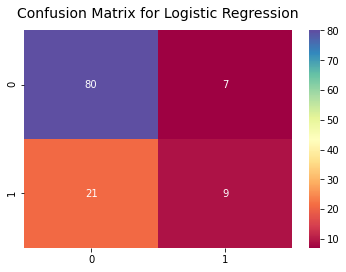

In [19]:
# Having a look at the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="DejaVu Sans", y=1.03);

In [20]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117



In [21]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore)

Accuracy obtained by Random Forest Classifier model: 0.7264957264957265


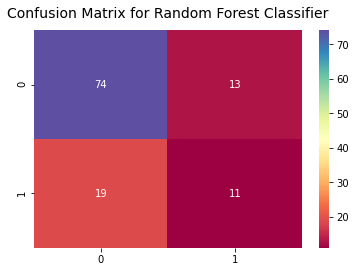

In [23]:
# Having a look at the confusion matrix

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03);

In [24]:
# Classification report of Random Forest Classifier

print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82        87
           2       0.46      0.37      0.41        30

    accuracy                           0.73       117
   macro avg       0.63      0.61      0.61       117
weighted avg       0.71      0.73      0.72       117



In [25]:
# K-NEIGHBORS CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore)

Accuracy obtained by K Neighbors Classifier model: 0.717948717948718


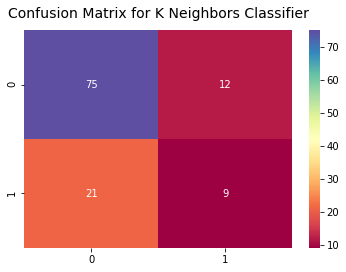

In [27]:
# Having a look at the confusion matrix
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03);

In [28]:
# Classification report of K Neighbors Classifier

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82        87
           2       0.43      0.30      0.35        30

    accuracy                           0.72       117
   macro avg       0.60      0.58      0.59       117
weighted avg       0.69      0.72      0.70       117



In [29]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore)

Accuracy obtained by Decision Tree Classifier model: 0.7008547008547008


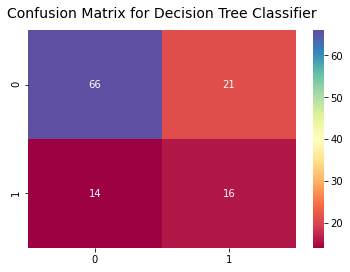

In [31]:
# Confusion matrix
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03);

In [32]:
# Classification Report of Decision Tree Classifier

print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.82      0.76      0.79        87
           2       0.43      0.53      0.48        30

    accuracy                           0.70       117
   macro avg       0.63      0.65      0.63       117
weighted avg       0.72      0.70      0.71       117



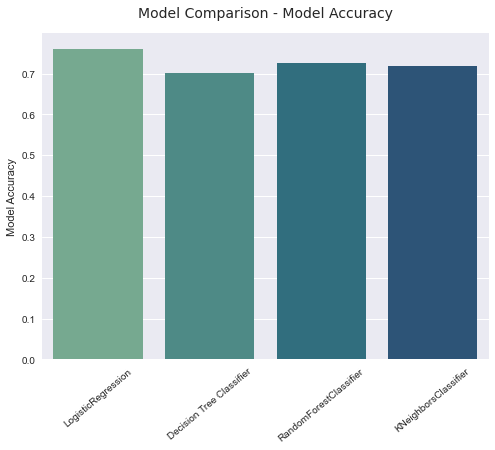

In [33]:
plt.style.use("seaborn")

x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="DejaVu Sans", y=1.03);